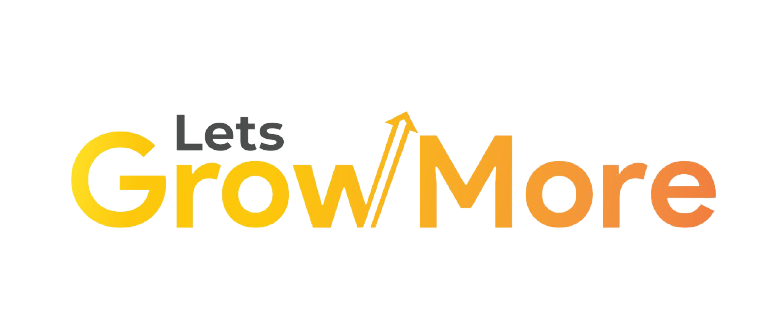

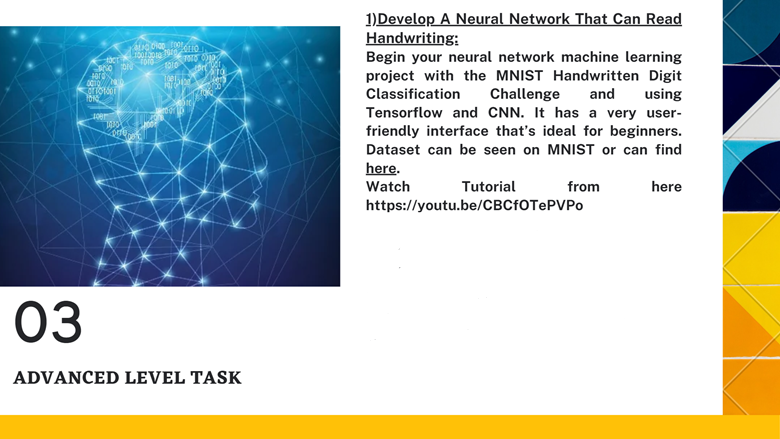

<p style = "font-size:18px"><b> BY: Lakshmi Sindhu.P </b></p>

# Introduction:

## Problem Statement:

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

----------------
## MNIST Handwritten Digit Classification Dataset:
* The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning.
* The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
* It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
* The MNIST dataset is an acronym that stands for the **Modified National Institute of Standards and Technology** dataset.

---------------
## Sample images of the MNIST dataset:
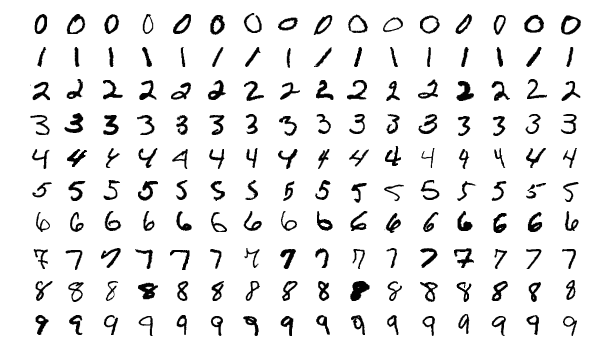

# Importing the required libraries and loading the MNSIT dataset from keras:

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

In [2]:
# example of loading the mnist dataset
from keras.datasets import mnist
# load dataset
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


<p style = "font-size:16px"><b>INFERENCE:</b></p>
We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

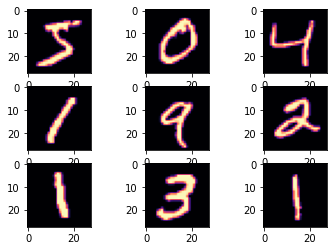

In [4]:
# plot first few images
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('magma'))

<p style = "font-size:16px"><b>INFERENCE:</b></p>
A plot of the first nine images in the dataset is also created showing the natural handwritten nature of the images to be classified.

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

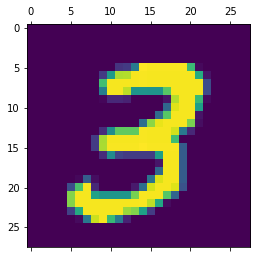

In [6]:
plt.matshow(X_train[7])
plt.show()

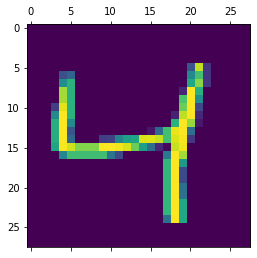

In [7]:
plt.matshow(X_train[2])
plt.show()

In [8]:
y_train[6]

1

<p style = "font-size:16px"><b>INFERENCE:</b></p>

As the pixel intensities are currently between the range of 0 and 255, we proceed to normalize the features by dividing 255.

# Data cleaning, normalisation and cleaning:

## Prepare Pixel data:
* Pixel values are often unsigned integers in the range between 0 and 255. Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as in the slower than expected training of the model.
 
 
We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Model fitting:
We proceed by fitting several simple neural network models using Keras (with TensorFlow as our backend) and collect their accuracy. The model that performs the best on the validation set will be used as the model of choice for the competition.

## Model 1: Very simple neural network with no hidden layers - 


In [15]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 944us/step - loss: 0.4706 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 876us/step - loss: 0.3044 - accuracy: 0.91450s - los
Epoch 3/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 860us/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.2664 - accuracy: 0.9258


In [16]:
model1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 749us/step - loss: 0.2649 - accuracy: 0.9274


[0.26493674516677856, 0.9273999929428101]

ACCURACY = 92.74%

In [17]:
y_predicted = model1.predict(X_test_flattened)
y_predicted[3]

array([9.9862742e-01, 1.7559115e-08, 1.5289220e-01, 5.5130422e-03,
       5.2518637e-05, 8.2981944e-02, 1.0754922e-01, 1.2665600e-02,
       2.6825935e-02, 3.5172611e-02], dtype=float32)

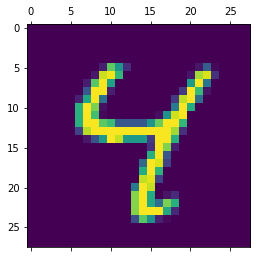

In [18]:
plt.matshow(X_test[6])
plt.show()

<p style = "font-size:16px"><b>INFERENCE:</b></p>
np.argmax finds a maximum element from an array and returns the index of it.

In [19]:
np.argmax(y_predicted[6])

4

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    3,    2,    0,    6,    8,    2,    2,    1],
       [   0, 1116,    5,    1,    0,    1,    3,    2,    7,    0],
       [   3,    8,  941,   12,    7,    3,   11,    9,   33,    5],
       [   1,    0,   27,  918,    1,   21,    2,   10,   21,    9],
       [   1,    1,    9,    0,  902,    0,    9,    4,    9,   47],
       [   7,    3,    9,   34,   11,  772,   10,    5,   33,    8],
       [   7,    3,    9,    1,    7,   10,  915,    2,    4,    0],
       [   1,    7,   28,    5,    8,    1,    0,  931,    2,   45],
       [   4,    8,    9,   18,    9,   19,    8,    9,  880,   10],
       [   7,    7,    3,    7,   14,    6,    0,   12,   10,  943]])>

Text(69.0, 0.5, 'Truth')

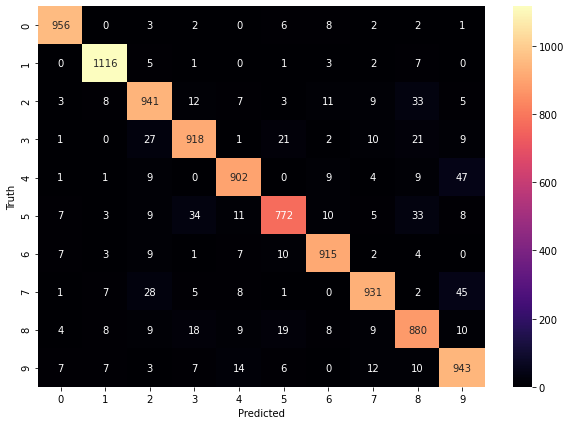

In [23]:
#Heatmap
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap = "magma")
plt.xlabel('Predicted')
plt.ylabel('Truth')

<p style = "font-size:16px"><b>INFERENCE:</b></p>
We saw that without using hidden layers, we got an accuracy of 92.74% .

## Model 2 : Using simple neural network with 1 layer - 

In [24]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2681 - accuracy: 0.9238: 0s - loss: 0.2
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1170 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.97 - 2s 1ms/step - loss: 0.0816 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0623 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0490 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0399 - accuracy: 0.9871: 0s - los
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0255 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 10/10
18

In [25]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 855us/step - loss: 0.0761 - accuracy: 0.9792


[0.07609810680150986, 0.979200005531311]

<p style = "font-size:16px"><b>INFERENCE:</b></p>
Here, we got an accuracy of 97.92% in the validation test set

## Model 3 : Using simple neural network with 3 layer - 

In [26]:
model3 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2084 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0922 - accuracy: 0.9717: 0s - loss: 0.0932 - accura
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0648 - accuracy: 0.9800:  - ETA: 0s - loss: 0.065
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 10/10
1875/1875 [=====

In [27]:
model3.evaluate(X_test_flattened,y_test)

313/313 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.97 - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9785


[0.10111711919307709, 0.9785000085830688]

ACCURACY = 97.85

Text(69.0, 0.5, 'Truth')

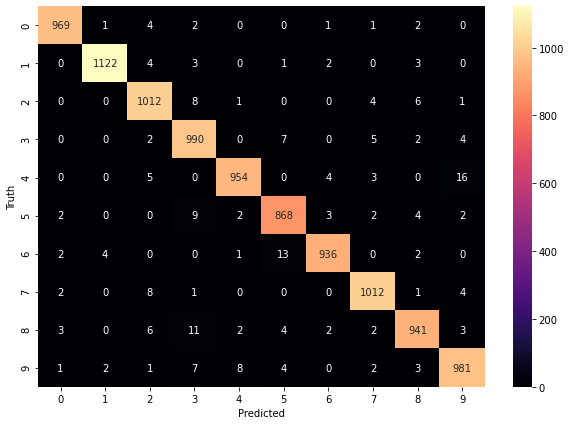

In [28]:
y_predicted = model3.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

# HeatMap
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap = "magma")
plt.xlabel('Predicted')
plt.ylabel('Truth')

<p style = "font-size:16px"><b>INFERENCE:</b></p>
Here, we got an accuracy of 97.85% in the validation test set.

<p style = "font-size:20px"><b><center> THANK YOU</center></b></p>